# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv') # Импорт данных 

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.info() # Просматриваем информацию о типах данных  датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Обращаем внимание, что у числового признака 'TotalSpent' тип данных object. При этом во всем датасете отсутсвуют nans. Позже при попытки перевести признак в другой формат возникает ошибка, опытным путем обнаруживаем, что в признаке встречаются значения типа string ' '. Удаляем строки с ними и приводим данные в к типу float.


In [5]:
data = data.replace(' ', np.nan) # заменяются пропущенные значения на nan
data = data.dropna()  #  удаляются строки с nan

data['TotalSpent'] = np.array(data['TotalSpent'], dtype=np.float32) # превод признака к типу float
X_origin = data.iloc[:, :-1] # сохранение оригинала данных для catboost
y = data[target_col] 


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Для численных признаков будут строится графики типа histogramm и boxplot.

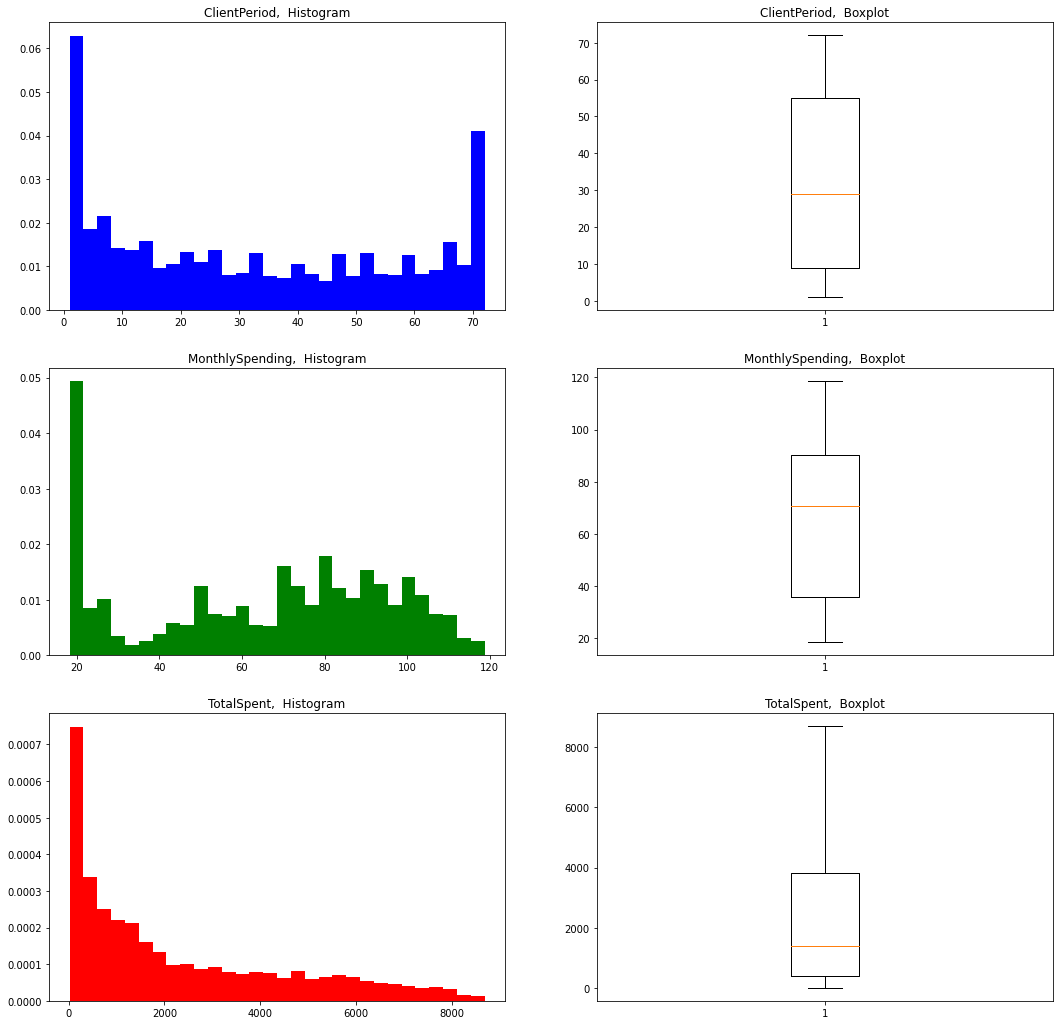

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(18, 18))
colors = ['blue', 'green', 'red']

for i, col in enumerate(num_cols):
  ax[i, 0].hist(data[col], density=True, bins=30, color=colors[i])
  ax[i, 0].set_title(col+',  Histogram')
  ax[i, 1].set_title(col+',  Boxplot')
  ax[i, 1].boxplot(data[col])

В целом, по виду графиков, можно сделать вывод о том, что для первого обучения датасет пригоден.


Для категориальных признаков рисуем круговые диаграммы и выписываем информацию о каждом признаке.


Male      2651
Female    2622
Name: Sex, dtype: int64
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64
No     2704
Yes    2569
Name: HasPartner, dtype: int64
No     3676
Yes    1597
Name: HasChild, dtype: int64
Yes    4754
No      519
Name: HasPhoneService, dtype: int64
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64
No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64
No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64
No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: int64
No    

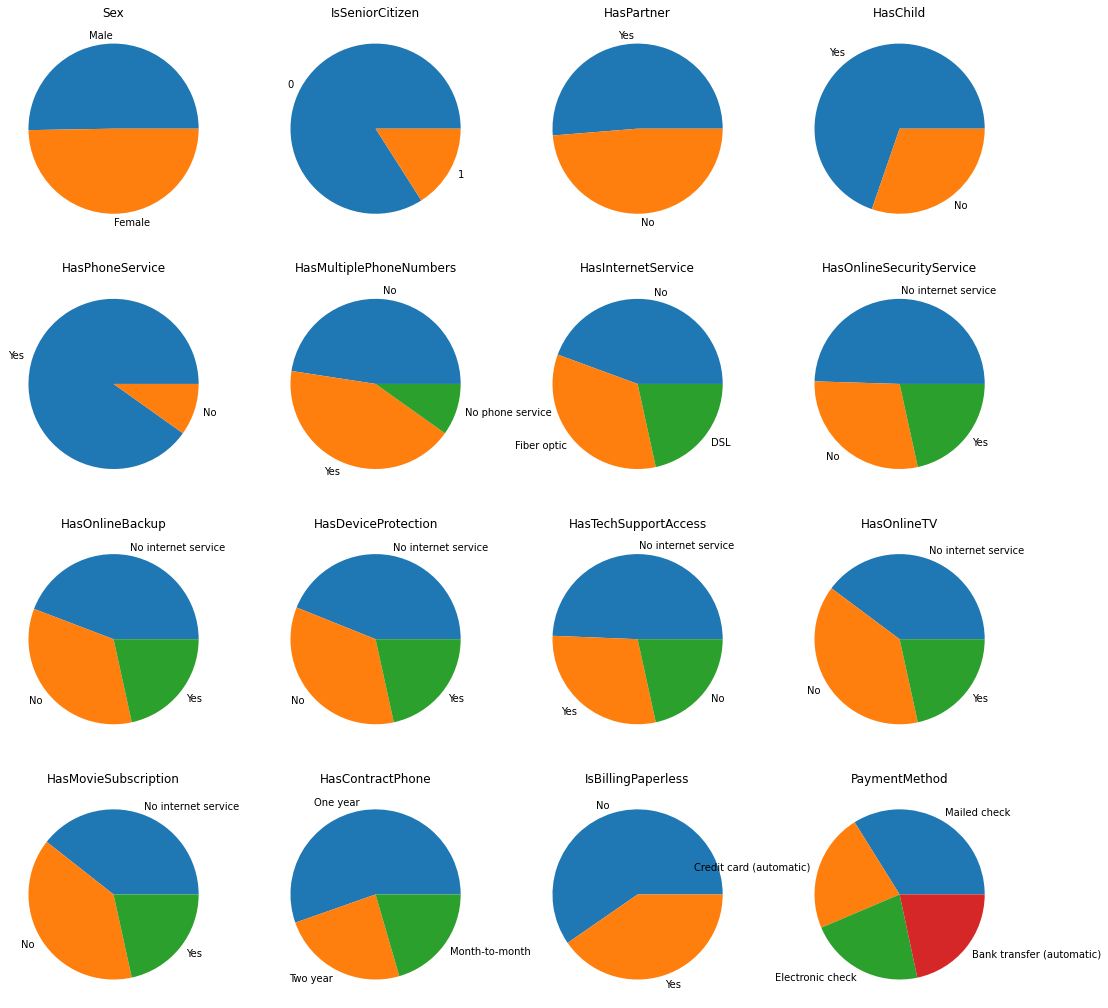

In [7]:
fig, ax = plt.subplots(int(len(cat_cols)/4), 4, figsize=(18, 18))

for i, col in enumerate(cat_cols):
  # ax[i, 0].bar(data[col].value_counts())
  ax[i//4, i%4].pie(data[col].value_counts(), labels = data[col].unique())
  ax[i//4, i%4].set_title(col)
  print(data[col].value_counts())
  

Смотрим распределение целевой переменной с помощью круговой диаграммы.

0    3889
1    1384
Name: Churn, dtype: int64


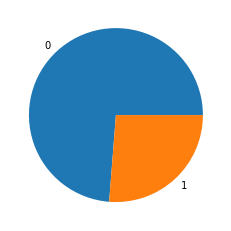

In [8]:
plt.pie(data[target_col].value_counts(), labels = data[target_col].unique())
print(data[target_col].value_counts())

Вывод: в датасете преобладают данные принадлежащие нулевому классу. Однако их количество не более чем в три раза больше, что говорит о том, что датасет можно считать сбалансированым.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Подготавливаем данные для линейных моделей:

In [10]:
numeric_data = data[num_cols] # Отделяем от датасета численные признаки
categorial_data = data[cat_cols] # Отделяем от датасета категориальные признаки
dummy_features = pd.get_dummies(categorial_data, drop_first=True) # Кодировка категориальных признаков с помощью one-hot
X = pd.concat([numeric_data, dummy_features], axis=1) # состаление признаков обратно в единый датасет


Масштабируем численные признаки, с помощью StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/glebg/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/glebg/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

{'C': 10} 0.8447387738306549


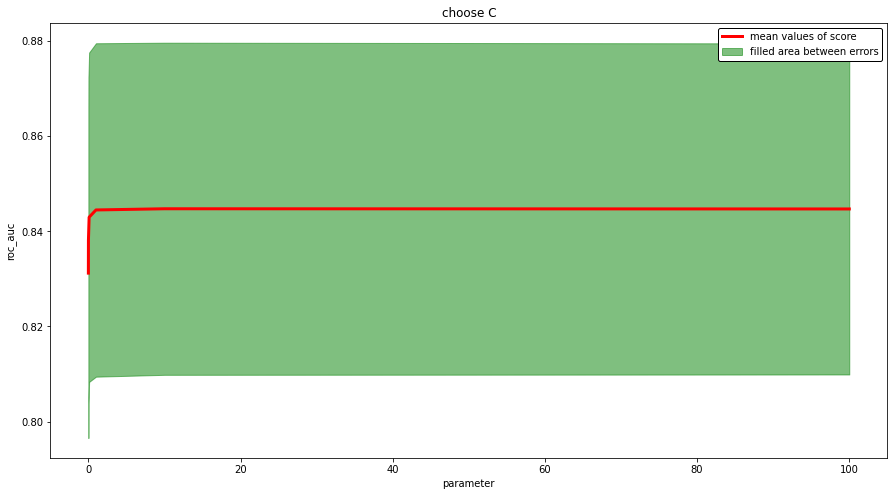

In [12]:
# Делим датасет на test и train
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

# Обучение будет проводится по модели логистической регресии, при этом с
# с помощью сетки для модели будет подбираться гиперпараметр C.
C = [100, 10, 1, 0.1, 0.01, 0.001] # Варианты гиперпараметра
model = LogisticRegression()
param_name = 'C'

parameters = {param_name: C}

CV_model = GridSearchCV(estimator=model, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)
CV_model.fit(X_train, y_train) # обучение модели

print(CV_model.best_params_, CV_model.best_score_)
means = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']

# составление графика для обученой модели

plt.figure(figsize=(15,8))
plt.title('choose ' + param_name)


plt.plot(C, means, label='mean values of score', color='red', lw=3)

plt.fill_between(C, means - 2 * error, means + 2 * error, 
                color='green', label='filled area between errors', alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.show()
    

По результату обученной модели, можно сделать вывод о том, что для логистической регрессии лучшим гиперпараметром C будет 10, при этом точность модели составляет 0.84474.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

[CV 3/5; 1/6] START C=100.......................................................
[CV 3/5; 1/6] END ........................C=100;, score=0.869 total time=   0.1s
[CV 3/5; 2/6] START C=10........................................................
[CV 3/5; 2/6] END .........................C=10;, score=0.869 total time=   0.3s
[CV 1/5; 3/6] START C=1.........................................................
[CV 1/5; 3/6] END ..........................C=1;, score=0.836 total time=   0.2s
[CV 3/5; 3/6] START C=1.........................................................
[CV 3/5; 3/6] END ..........................C=1;, score=0.869 total time=   0.2s
[CV 1/5; 4/6] START C=0.1.......................................................
[CV 1/5; 4/6] END ........................C=0.1;, score=0.835 total time=   0.3s
[CV 1/5; 5/6] START C=0.01......................................................
[CV 1/5; 5/6] END .......................C=0.01;, score=0.832 total time=   0.1s
[CV 3/5; 5/6] START C=0.01..

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [19]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 28 kB/s 


Испытваем модель градиентного бустнига

In [20]:
import catboost



X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin, y, 
                                                       train_size=0.8, 
                                                       random_state=42)

boosting_model = catboost.CatBoostClassifier(eval_metric='AUC', 
                                             cat_features=cat_cols)

# Поиск гиперпараметров будет осуществляться с помощью сетки, где перебираться будут
#    - learning rate
#    - число деревьев 
boosting_model.grid_search({'learning_rate': np.linspace(0, 1, 10), 'num_trees': np.arange(5, 10)}, X_train_origin, y_train)



0:	test: 0.7659490	best: 0.7659490 (0)	total: 55.7ms	remaining: 223ms
1:	test: 0.7985109	best: 0.7985109 (1)	total: 65.4ms	remaining: 98.1ms
2:	test: 0.8153080	best: 0.8153080 (2)	total: 73.2ms	remaining: 48.8ms
3:	test: 0.8157346	best: 0.8157346 (3)	total: 79.5ms	remaining: 19.9ms
4:	test: 0.8179641	best: 0.8179641 (4)	total: 85.8ms	remaining: 0us

bestTest = 0.8179641213
bestIteration = 4

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8179641	best: 0.8179641 (0)	total: 103ms	remaining: 5.03s
0:	test: 0.7659490	best: 0.7659490 (0)	total: 6.6ms	remaining: 26.4ms
1:	test: 0.7996325	best: 0.7996325 (1)	total: 13.4ms	remaining: 20.1ms
2:	test: 0.8166016	best: 0.8166016 (2)	total: 19.4ms	remaining: 13ms
3:	test: 0.8164778	best: 0.8166016 (2)	total: 25.6ms	remaining: 6.4ms
4:	test: 0.8365675	best: 0.8365675 (4)	total: 30.2ms	remaining: 0us

bestTest = 0.8365675082
bestIteration = 4

Metric AUC

{'cv_results': defaultdict(list,
             {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8],
              'test-AUC-mean': [0.7801862434049481,
               0.8110619130172223,
               0.8246527198940319,
               0.8334908524805383,
               0.8343111940913536,
               0.8357124787720983,
               0.8374754432236918,
               0.8389015263512026,
               0.8394436646317752],
              'test-AUC-std': [0.013711935530136806,
               0.007354352588315732,
               0.004531021789991076,
               0.009710514901148543,
               0.011722905252256508,
               0.01316361150089141,
               0.013905282846997939,
               0.013500128556405186,
               0.013301305687523773],
              'test-Logloss-mean': [0.49997765390927085,
               0.4552086046521064,
               0.4380623693161893,
               0.42915706254640806,
               0.42921833556849087,
               0.427852186202

In [21]:
boosting_model.best_iteration_

Таким образом лучшее качество получилось при гиперпараметрах learning_rate=0.8 и количеству деревьев равному 5. Качество составляет 0.85479

# Предсказания

In [ ]:
best_model = boosting_model # выобр лучшей модели

In [ ]:
from sklearn.metrics import roc_auc_score

X_test = pd.read_csv('./test.csv')


submission = pd.read_csv('./submission.csv')

# print(best_model.predict(X_test))
# print(best_model.predict_proba(X_test)[:, 1])
# print(roc_auc_score(best_model.predict(X_test), best_model.predict_proba(X_test)[:, 1]))

submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

[0 1 1 ... 1 1 0]
[0.04528799 0.62065953 0.58597863 ... 0.7422159  0.50342966 0.02740114]
1.0


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.